In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../scripts")
from db_utils import read_query_as_df
%matplotlib inline

In [2]:
tickers = ['NVDA', 'AAPL']
placeholder = ', '.join(f"'{t}'" for t in tickers)

In [3]:
query = f"""SELECT * FROM stock_prices WHERE stock in ({placeholder});"""
plot_data = read_query_as_df(query)

In [4]:
plot_data

,date,close,high,low,open,volume,stock
0,2025-02-03 00:00:00,227.759583,231.575395,225.452122,229.737419,73063300,AAPL
1,2025-02-04 00:00:00,232.544327,232.873966,226.401072,227.000419,45067300,AAPL
2,2025-02-05 00:00:00,232.214691,232.414468,228.019307,228.279016,39620300,AAPL
3,2025-02-06 00:00:00,232.963867,233.543232,230.176923,231.035979,29925300,AAPL
4,2025-02-07 00:00:00,227.380005,233.743004,227.010401,232.344548,39707200,AAPL
...,...,...,...,...,...,...,...
75,2025-03-25 00:00:00,120.690002,121.290001,118.919998,120.550003,167447200,NVDA
76,2025-03-26 00:00:00,113.760002,118.839996,112.709999,118.730003,293463300,NVDA
77,2025-03-27 00:00:00,111.430000,114.449997,110.660004,111.349998,236902100,NVDA
78,2025-03-28 00:00:00,109.669998,112.870003,109.070000,111.489998,229872500,NVDA


In [5]:
plot_data['date'] = pd.to_datetime(plot_data['date'])


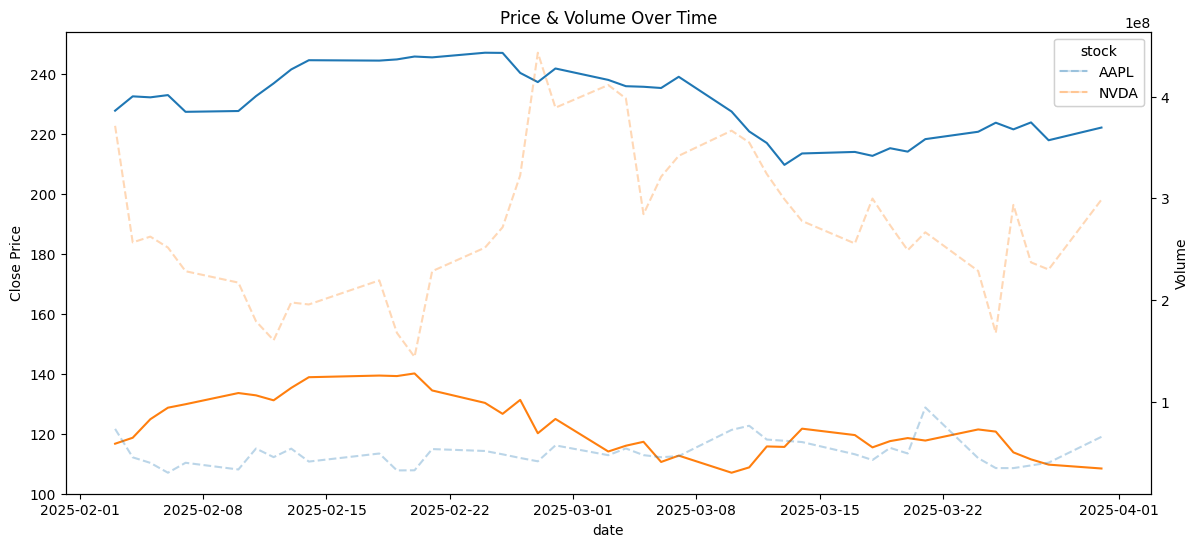

In [6]:
fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=plot_data, x='date', y='close', hue='stock', ax=ax1)
ax1.set_ylabel("Close Price")

ax2 = ax1.twinx()

sns.lineplot(data=plot_data, x='date', y='volume', hue='stock', ax=ax2, alpha=0.3, linestyle="--")
ax2.set_ylabel("Volume")

plt.title("Price & Volume Over Time")
plt.show()

In [7]:
merged_df = pd.read_csv('../data/candlethrob_dataset.csv')

In [8]:
merged_df.head(5)

,date,close,high,low,open,volume,stock,polarity,subjectivity,daily_return,sentiment_spike,neg_sentiment,vol_spike,day_of_week,sentiment_label,rolling_mean,rolling_std,spike_direction,rolling_sentiment,spike_type
0,2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400,AAPL,0.000000,0.000000,NaN,False,False,False,Monday,Neutral,NaN,NaN,NaN,NaN,NaN
1,2025-02-27,237.300003,242.460007,237.059998,239.410004,41153600,AAPL,0.157143,0.484821,-0.039660,True,False,False,Thursday,Positive,0.078571,0.111117,Positive Spike,NaN,Sentiment
2,2025-03-12,216.979996,221.750000,214.910004,220.139999,62547500,AAPL,0.100000,0.400000,-0.085630,False,False,False,Wednesday,Positive,0.085714,0.079539,NaN,NaN,NaN
3,2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400,AAPL,-0.071429,0.214286,-0.008019,True,False,False,Wednesday,Negative,0.061905,0.118952,Negative Spike,NaN,Sentiment
4,2025-03-20,214.100006,217.490005,212.220001,213.990005,48862900,AAPL,0.266886,0.458613,-0.005296,True,False,False,Thursday,Positive,0.098486,0.169162,Positive Spike,NaN,Sentiment


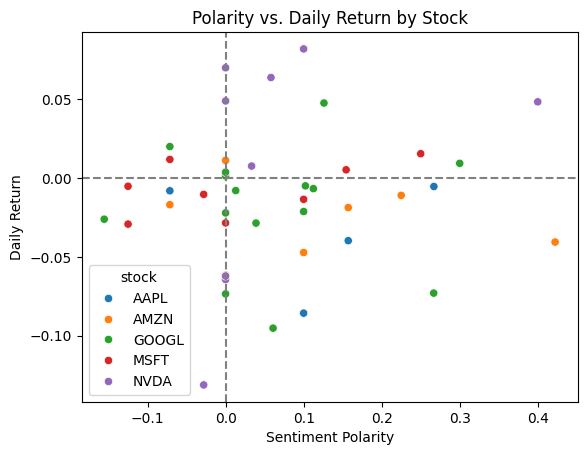

In [9]:
sns.scatterplot(data=merged_df, x="polarity", y="daily_return", hue="stock")
plt.title("Polarity vs. Daily Return by Stock")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Daily Return")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

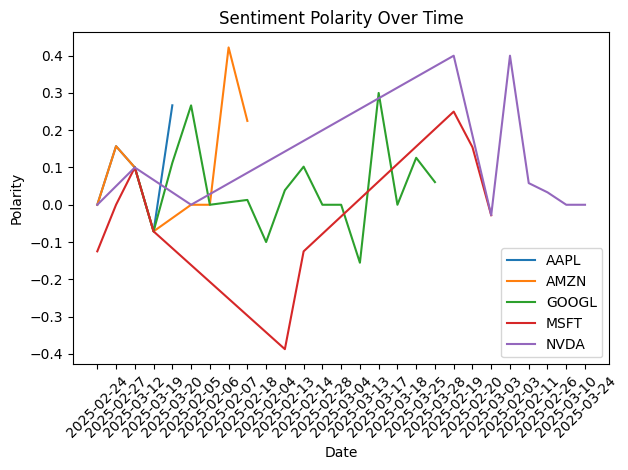

In [10]:
for stock in merged_df['stock'].unique():
    stock_df = merged_df[merged_df['stock'] == stock]
    sns.lineplot(x=stock_df['date'], y=stock_df['polarity'], label=stock)

plt.legend()
plt.title("Sentiment Polarity Over Time")
plt.xlabel("Date")
plt.ylabel("Polarity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

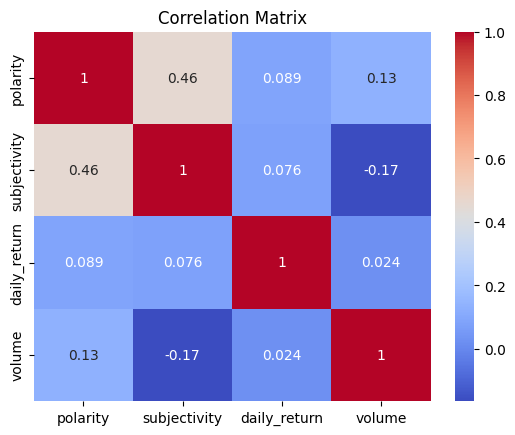

In [11]:
correlation = merged_df[['polarity', 'subjectivity', 'daily_return', 'volume']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [12]:
merged_df['sentiment_label'] = merged_df['polarity'].apply(lambda x: "Positive" if x > 0.05 else "Negative" if x < -0.05 else "Neutral")


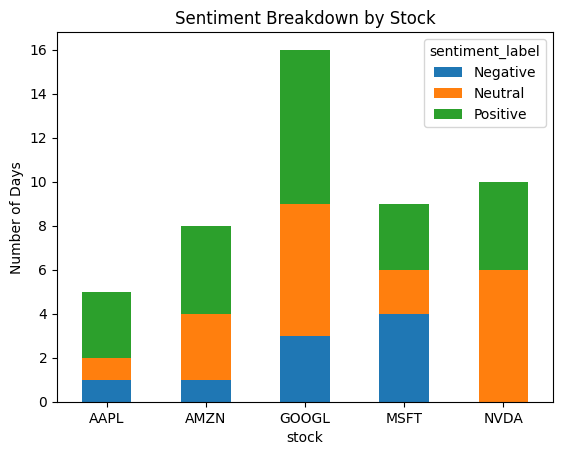

In [13]:
sentiment_counts = merged_df.groupby(['stock', 'sentiment_label']).size().unstack()
sentiment_counts.plot(kind='bar', stacked=True)
plt.title("Sentiment Breakdown by Stock")
plt.ylabel("Number of Days")
plt.xticks(rotation=0)
plt.show()

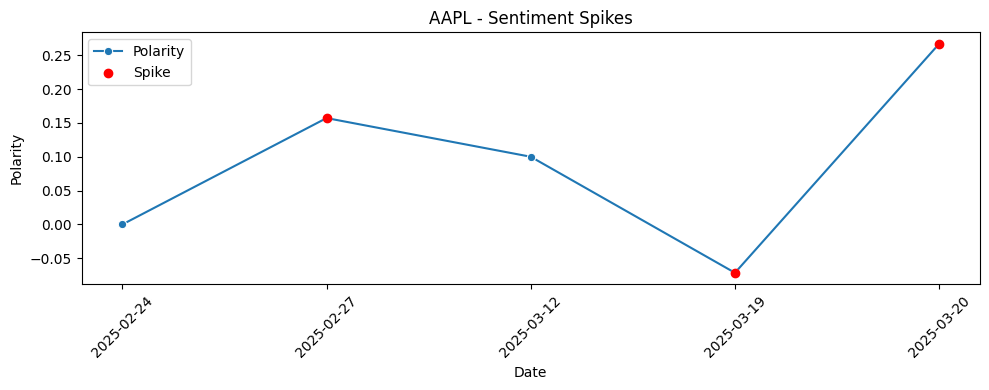

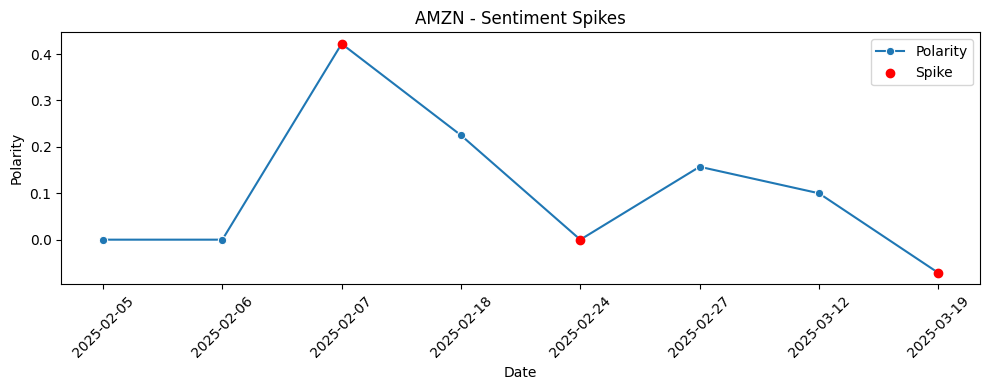

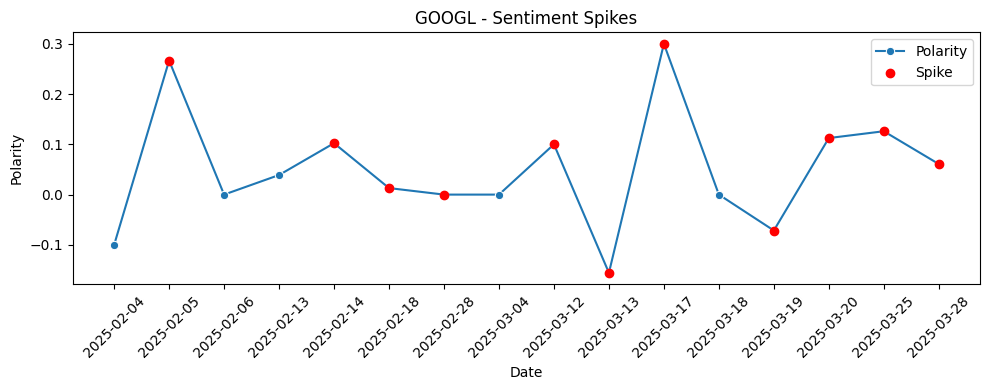

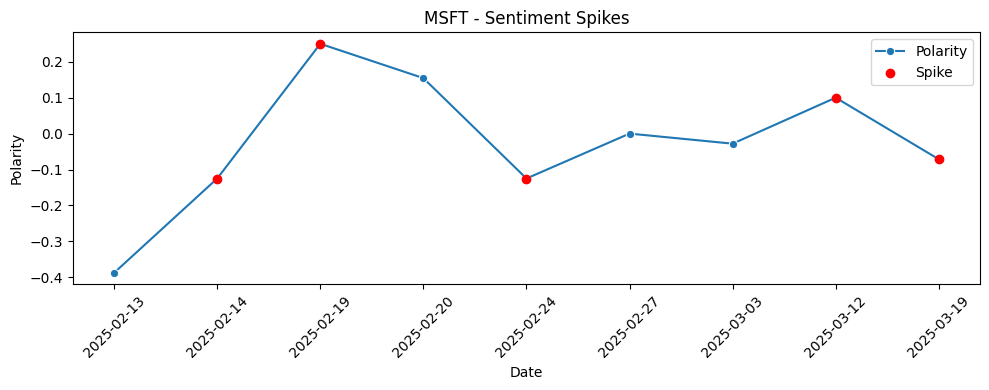

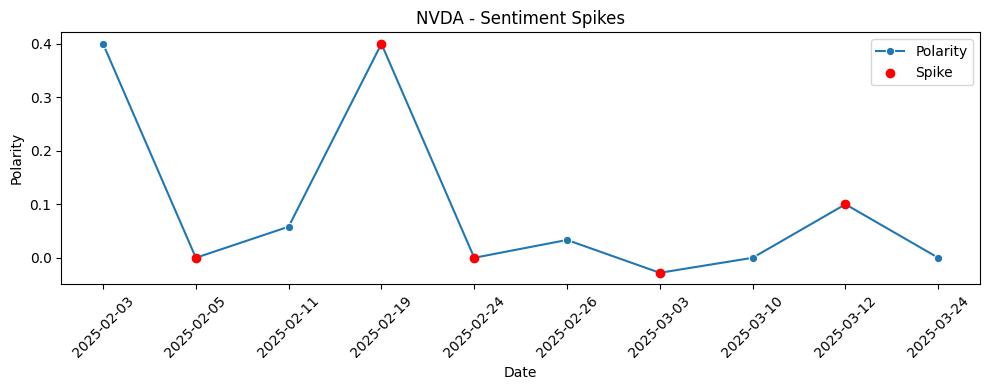

In [14]:
for stock in merged_df['stock'].unique():
    stock_df = merged_df[merged_df['stock'] == stock]

    plt.figure(figsize=(10, 4))
    sns.lineplot(x=stock_df['date'], y=stock_df['polarity'], label='Polarity', marker='o')
    plt.scatter(stock_df[stock_df['sentiment_spike']]['date'],
                stock_df[stock_df['sentiment_spike']]['polarity'],
                color='red', label='Spike', zorder=5)
    plt.title(f"{stock} - Sentiment Spikes")
    plt.xlabel("Date")
    plt.ylabel("Polarity")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
